# Aprendizaje no supervisado - Clustering

EN este notebook se explora la implementación de modelos de aprendizaje no supervisados de culterización mediante el algoritmo K-means.

## 1. Análsisi exploratorio de datos - EDA

In [ ]:
# Se importan las librerías necesarias para la ejecución del proceso
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [ ]:
# Se carga el archivo con los datos de ventas por hora archivo: hour.csv
df_customer = pd.read_csv('Wholesale customers data.csv')
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Este conjunto de datos contiene información de los clientes de un distribuidor mayorista, en donde se detalla el gasto anual en unidades monetarias (m.u.) en diversas categorías de productos.

En el conjunto de datos se tiene un total de 440 registros que contienen las siguientes columnas:

1) FRESH: annual spending (m.u.) on fresh products (Continuous)

2) MILK: annual spending (m.u.) on milk products (Continuous)

3) GROCERY: annual spending (m.u.)on grocery products (Continuous)

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8) REGION: customers at Region in Lisnon, Oporto or Other (Nominal)

A continuación se realiza un análisis de los datos

In [ ]:
#Se realiza un análisis de cálculos estadísticos
df_customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Se verifica si los tipos de datos del conjuntoi de datos con correctos
df_customer.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [ ]:
df_customer['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [ ]:
df_customer['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

<b>Consideraciones preliminares</b>

Se identifica en el conjunto de datos que se tienen variables categóricas (Regin y Channel) y variables continuas como son el resto de atributos. El problema puede ser abordado de dos maneras desde mi punto de vista.

<b>Opción 1:</b> Tomar todas las variables conviertiendo las variavles categóricas a unas variables de tipo dummy para que se puedan considerar todas las variables para el agrupamiento. La generación de los grupos en este caso tiene una mayor complejidad para propósito de entendimiento de los grupos.

<b>Opción 2:</b> Para la segunda opción de análisis se esperaría encontrar cuáles canales y en qué regiones tienen un comportamiento similar en cuanto al gasto por categoría. Por tanto en principio se pueden considerar las variables correspondientes a Fresh, Milk, Grocery, Frozen, Detergents_paper y Delicantensen.

Para propósitos del análisis del laboratorio se seguirá la opción número 1.

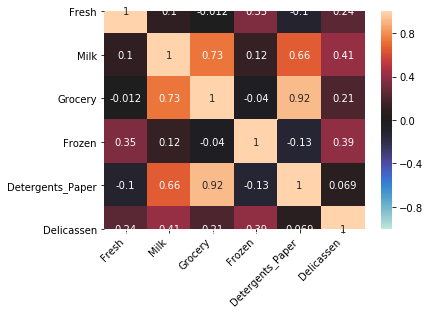

In [ ]:
# Se analiza la correlación de las variables que son numéricas

df_customer_variables = df_customer[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

df_correlations = df_customer_variables.corr()

fig, ax = plt.subplots()   
sns.heatmap(
    df_correlations, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True,
    ax=ax)

ax.set_xticklabels(
     ax.get_xticklabels(),
     rotation=45,
     horizontalalignment='right'
 );

En esta gráfica de análisis de correlación, se observa que las variables de 'Grocery' y 'Detergents paper' tienen una alta correlación y se podría evaluar eliminar alguna de las dos variables. En esta caso se hace la pruena eliminando la variable 'Grocery'.

In [ ]:
# Se elimina el atributo Grocery del dataset
df_customer_variables = df_customer_variables.drop('Grocery', axis=1)

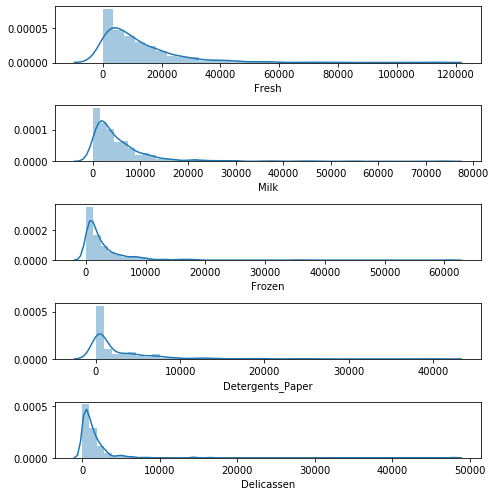

In [ ]:
# Se hace una prueba de la distribución de las variables seleccionadas
fig, axes = plt.subplots(5,1, figsize=(7, 7))
sns.distplot(df_customer_variables['Fresh'], ax=axes[0])
sns.distplot(df_customer_variables['Milk'], ax=axes[1])
sns.distplot(df_customer_variables['Frozen'], ax=axes[2])
sns.distplot(df_customer_variables['Detergents_Paper'], ax=axes[3])
sns.distplot(df_customer_variables['Delicassen'], ax=axes[4])
plt.tight_layout()

Se puede observar que las distribuciones de probabilidad de las variables muestran un sesgo positivo lo cual indica que los valores se concentran en los valores pequeños. Esta gráfica igualmente sugiere la existencia de valores extremos en el conjunto de datos. Se explora diagramas de pares analizando las relaciones con las variables de canales(Channel) y Region.

C:\Users\ofbon\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ofbon\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


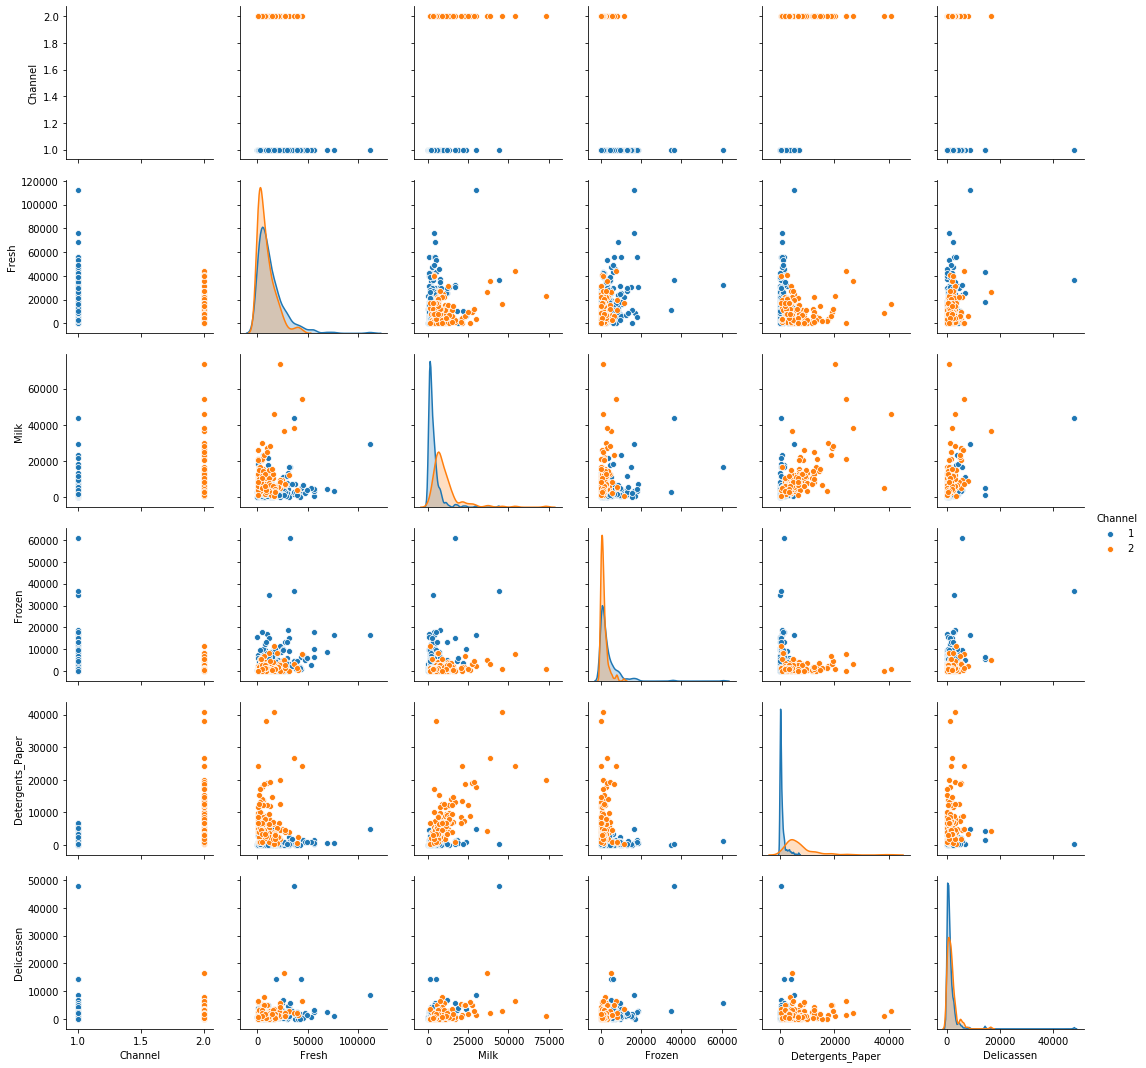

In [ ]:
#Sobre las variables restantes se realiza un diagrama de pares para la variable de canal
df_customer_variables2 = df_customer[['Channel','Fresh','Milk','Frozen','Detergents_Paper','Delicassen']]
sns.pairplot(df_customer_variables2, hue='Channel')

En esta gráfica se puede observar que algunas pares de variables generan una separación visible de los registros por grupo de Canal (Channel). Lo que muestra que la combinación en el algoritmo de agrupamiento puede generar una adecuada segmentación de los datos.

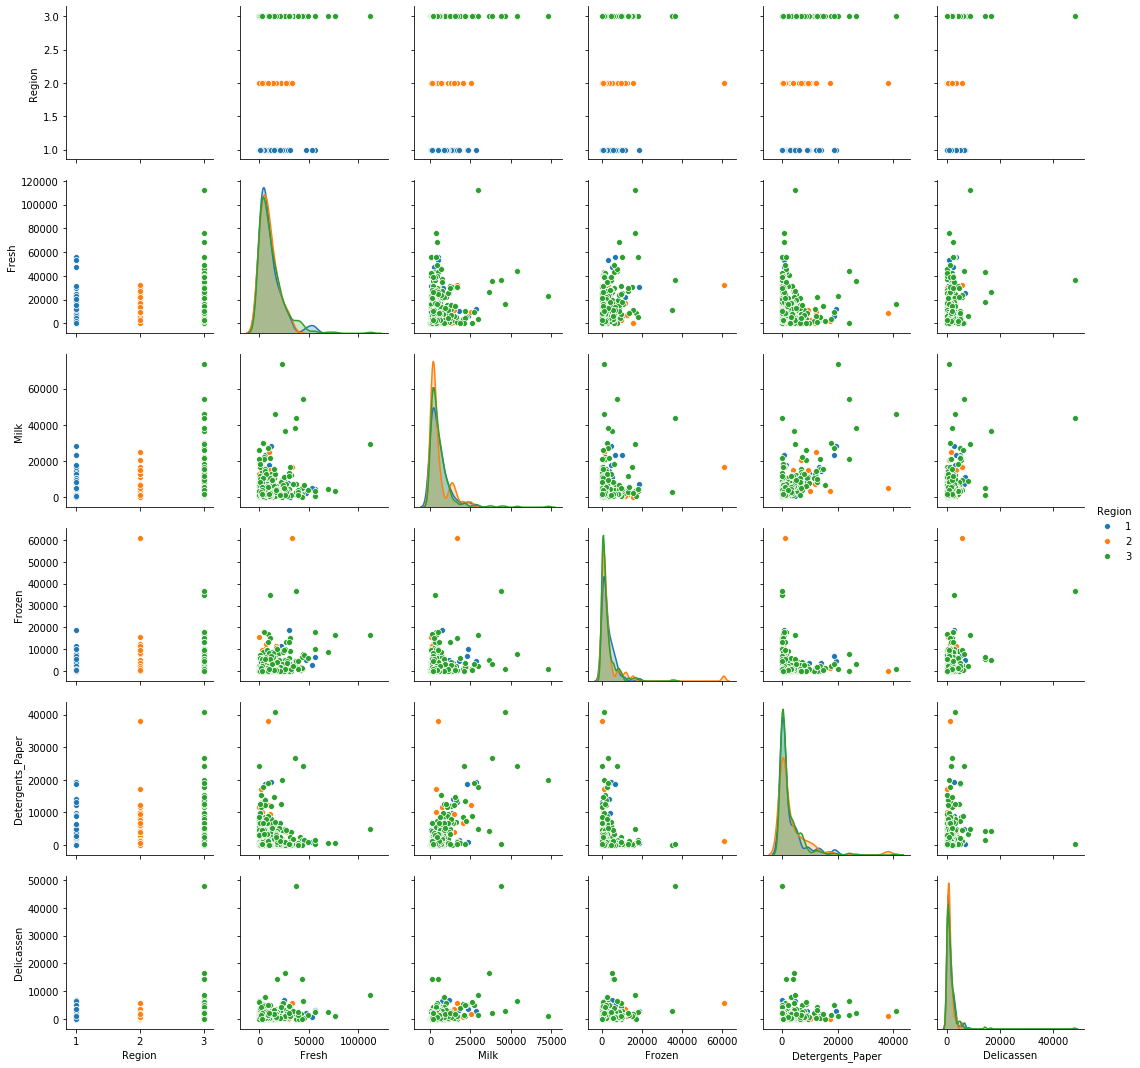

In [ ]:
#Sobre las variables restantes se realiza un diagrama de pares para la variable de Region
df_customer_variables3 = df_customer[['Region','Fresh','Milk','Frozen','Detergents_Paper','Delicassen']]
sns.pairplot(df_customer_variables3, hue='Region')

En este diagrama se observa que no se evidencia que alguan de las variables específicas no logran separar facilmente el conjunto de datos por región.

### Conclusiones del análisis exploratorio

En el análisis exploratorio de los datos muestra que se debe realizar una trasformación de las variales categóricas y eliminación de un atributo considerando al correlación de las variables 'Grocery' y 'Detergents paper'.

## 2. Identificación de valores faltantes

In [ ]:
# Identificar la existencia de valores nulos en el conjunto de datos
df_customer_variables.isnull().sum(axis = 0)

Fresh               0
Milk                0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Se puede evidenciar que no se tienen datos nulos en los datasets.

In [ ]:
# Se cuantos registros tienes valor cero por cada columna.
df_customer_variables.isin([0]).sum()

Fresh               0
Milk                0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Se puede evidenciar que en el conjunto no se tienen datos con valor cero.

## 3. Preparación y trasnformación de datos

In [ ]:
# para la transformación de los datos categóricos se usa
dummies = pd.get_dummies(df_customer[['Channel', 'Region']], columns=['Channel','Region'], prefix = ['Channel', 'Region'])
dummies.head(2)

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1


In [ ]:
df_customer_variables_transformado = pd.concat([df_customer_variables, dummies], axis=1)
df_customer_variables_transformado.head(2)

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,214,2674,1338,0,1,0,0,1
1,7057,9810,1762,3293,1776,0,1,0,0,1


### 4. Ejecución del modelo de clusterización

Para el presente ejercicio se va a utilizar el modelo de clusterizaciónde KMeans de la librería Sklearn

In [ ]:
# Se importan las librerías requeridas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [ ]:
# Antes de aplicar la clusterización se utiliza el escalado de los datos.
df_customer_variables_normalizado = preprocessing.normalize(df_customer_variables_transformado)

In [ ]:
# Se realiza el agrupamiento con k-means - se toma un valor inicial de 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df_customer_variables_normalizado)

In [ ]:
# Para facilitar la visualización se utiliza la reducción de dimensionalidad mediante PCA (Análisis de componentes principales)
# Referencia de consulta: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 
df_pca = pd.DataFrame(PCA(2).fit_transform(df_customer_variables_normalizado))
df_pca = df_pca.rename(columns={0:'x',1:'y'})
df_pca['labels'] = kmeans.labels_

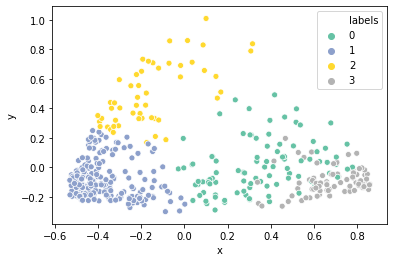

In [ ]:
# Se visualizan los datos generados mediante PCA
ax = sns.scatterplot(x=df_pca.x, y=df_pca.y, hue=df_pca.labels, palette="Set2")

## 5. Identificación del número de grupos óptimo para la clusterización

Para la identificación del número de grupos óptimo se realiza una comparación a partir del método del sumatoria del cuadrado de las distancias. Se calcula para un rango de valores del número de grupos k.

Text(0.5, 1.0, 'Evaluación del número k de grupos óptimo')

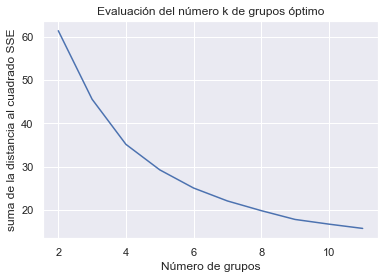

In [ ]:
# Se realiza la identificación del número de grupos óptimo con una búsqueda entre 2 y 10 grupos con medida de inercia 
# que calcula la suma las distancia al cuadrado de los datos con cada centro del grupo más cercano

scores = [KMeans(n_clusters=i+2).fit(df_customer_variables_normalizado).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Número de grupos')
plt.ylabel("suma de la distancia al cuadrado SSE")
plt.title("Evaluación del número k de grupos óptimo")

Se puede observar el valor que se aproxima al "método del codo" corresponde a 6.

#### Gráfica de los seis grupos del modelo de kmeans

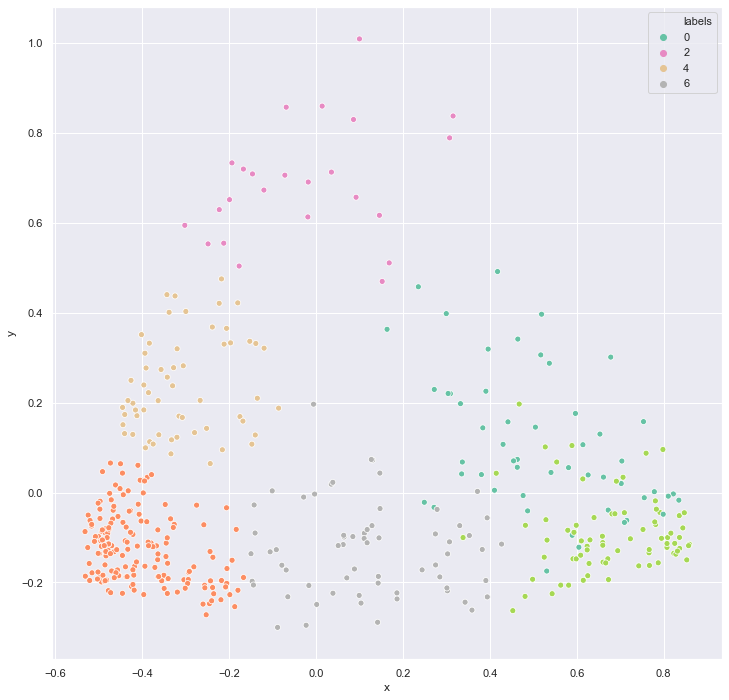

In [ ]:
# Se realiza el agrupamiento con k-means - se toma un valor 6  obtenido de la optimización mediante el método del codo
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df_customer_variables_normalizado)
df_pca = pd.DataFrame(PCA(2).fit_transform(df_customer_variables_normalizado))
df_pca = df_pca.rename(columns={0:'x',1:'y'})
df_pca['labels'] = kmeans.labels_
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(x=df_pca.x, y=df_pca.y, hue=df_pca.labels, palette="Set2")

En esta gráfica se puede observar con respecto a la que se realizó con 4 grupos que se mejora la segmentación de los grupos del lado derecho aun algunos elementos aún se ven combinados.

### 6. Interpretación de resultados

Para facilitar la interpretación de los resultados, se utiliza una visualización basada en graficar los valores normalizados promedio de las variable numéricas y la moda de las variables categóricas en cada grupo del cluster como se presenta a continuación:

In [ ]:
# Datos númericos normalizados
df_customer_normalizado = preprocessing.normalize(df_customer_variables)

In [ ]:
# se crean dos dataframes que contienen los valores normalizados de las variables numéricas y los labels de los grupos.
# y el segundo contiene las variables categóricas con los labels de los grupos.
df_clusters_numericos = pd.DataFrame(df_customer_normalizado, index=df_customer_variables.index, columns=df_customer_variables.columns)
df_clusters_numericos["cluster"] = kmeans.labels_

df_clusters_categoricos = df_customer[['Channel', 'Region']].copy()
df_clusters_categoricos = df_clusters_categoricos / df_clusters_categoricos.max()
df_clusters_categoricos["cluster"] = kmeans.labels_

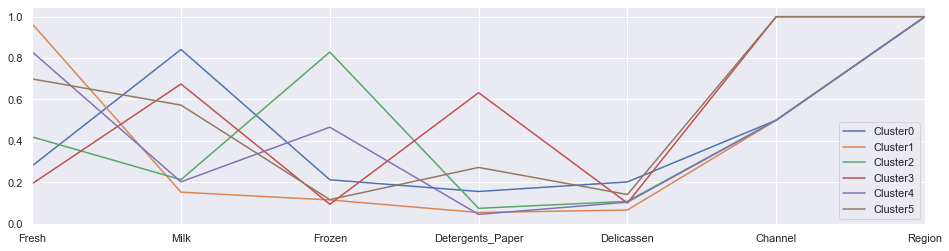

In [ ]:
plt.figure(figsize=(16, 4))
for k in range(0,6):
    df_cluster_temp1 = df_clusters_numericos[df_clusters_numericos['cluster'] == k].mean(axis=0).drop('cluster')
    df_cluster_temp2 = df_clusters_categoricos[df_clusters_categoricos['cluster'] == k].mode(axis=0)
    df_cluster_temp1['Channel'] = df_cluster_temp2['Channel'].max()
    df_cluster_temp1['Region'] = df_cluster_temp2['Region'].max()
    df_cluster_temp1.plot(label='Cluster'+str(k))
plt.legend()

Como se puede observar en la gráfica, cada grupo resalta un color con los valores altos o bajos, la interpretación de cada grupo podría ser la siguiente:

 - <b>Grupo 0:</b> En este grupo se observa que se tienen valores altos en la categoría Milk y bajos en los otros valores y se asocia con el tipo de canal 1 que corresponde a Horeca.
 
 - <b>Grupo 1:</b> En este grupo se observa que se tienen valores altos de freshy bajo en las demás categorías y asocia también con el tipo de canal 1 que corresponde a Horeca.
 
 
 - <b>Grupo 2:</b> En este grupo se observa que se tienen valores altos de freshy bajo en las demás categorías y asocia también con el tipo de canal 1 que corresponde a Horeca.
 
 
  - <b>Grupo 3:</b> En este grupo se observa que se tienen valores altos de Milk y Detergents paper y bajo en las demás categorías y asocia también con el tipo de canal 1 que corresponde a Retail Channel.
 
 
  - <b>Grupo 4:</b> En este grupo se observa que se tienen valores altos de fresh, medio en Frozen y bajo en las demás categorías y asocia también con el tipo de canal 1 que corresponde a Retail Channel.
 
 
  - <b>Grupo 5:</b> En este grupo se observa que se tienen valores altos de fresh y Milk, medio en Detergents paper y bajo en las demás categorías y asocia también con el tipo de canal 1 que corresponde a Retail Channel.
 
Como observación especial, se puede identificar que la separación del tipo de región no está tan clara en los grupos, pero la causa es que la Region 3 es la predominante en los datos con más del 72% de los registros.

## 7. Conclusiones adicionales del ejercicio

Como conclusión general del ejercicio se observa que se requiere tener especial cuidado en la clusterización de con el uso de datos categóricos y numéricos, pues el modelo de funcionamiento de Kmeans se basa en cálculo de distancias. La interpretación de estos modelos puede ser un poco compleja dada la dimensionalidad pues para poder visualizar los grupos se realiza una proyección en 2D que de alguna manera no permite visualizar de manera adecuada la separación de los grupos.